# 1-4-ライブラリ

- 標準ライブラリ
- サードパーティ製パッケージ

# 標準ライブラリ

Pythonには数多くの標準ライブラリがある

例えば、以下のような物がある

- 日付を扱う datetime
- 10進数を扱う decimal
- 分数を扱う fractions
- 乱数を扱う random
- 正規表現を使う re
- 数学関係 math


https://docs.python.org/ja/3/library/index.html

In [1]:
import random
random.choice([1, 2, 3])

1

In [2]:
random.random()

0.27808929942664284

In [5]:
import re
re.search(r'[0-9]+', 'test234')

<re.Match object; span=(4, 7), match='234'>

In [6]:
import math
math.sin(3.14)

0.0015926529164868282

In [7]:
from math import sin
sin(0)

0.0

In [8]:
import math as m
m.sin(1.57)

0.9999996829318346

# サードパーティ製パッケージ

Python標準にない機能を提供

例えば、以下のような物がある

- NumPy (配列演算)
- SciPy (科学技術計算)
- pandas (DataFrame)
- Matplotlib (可視化ツール)
- Scikit-learn (機械学習ツールキット)
- Jupyter Notebook (ブラウザ上でPythonの実行ができる)
- BeautifulSoup4 (HTML解析)

## 導入方法

- pipを使う
- Anacondaに同梱 もしくは condaを使う

```
$ pip install numpy
```

In [9]:
import numpy as np
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
X1 = np.array([[1, 2, 3], [4, 5, 6]])
X2 = np.array([[1, 2], [3, 4], [5, 6]])
X1 @ X2

array([[22, 28],
       [49, 64]])

In [15]:
from scipy.stats import norm
norm.rvs(loc=0, scale=1, size=1)

array([-0.12715737])

In [16]:
norm.rvs(loc=0, scale=1, size=100)

array([-1.07012512,  0.97201809,  1.32990284, -0.13280531, -0.09480806,
       -0.11806032, -1.46651328,  0.89178267,  2.19865821, -0.07622325,
       -0.7018494 , -0.64353525,  0.52133154,  0.14881966, -0.31655545,
       -0.16017145,  0.34359109, -0.62706562,  0.18962078, -1.16922592,
       -0.55521815, -0.74892792,  1.38213973, -0.29902304, -1.38937636,
       -1.26731812,  0.60767726, -2.44609264, -1.68660549, -1.11518043,
       -0.3794249 ,  0.39164757,  1.03284911,  0.19873095, -1.50382306,
       -1.27465638, -0.247768  , -0.17700226,  1.45667806,  0.62807226,
       -1.75727749,  1.29740102,  1.28954599, -1.34180967, -1.05717871,
        1.40210775, -0.08073238,  0.24036137,  0.04903762,  1.08709395,
        0.46907935,  0.0969948 , -1.39578915, -0.22202337,  0.39232297,
        0.10109065,  0.43808771,  1.4784149 , -0.44027133,  0.49344127,
       -1.20655314, -1.28891715,  1.29192476, -1.15700355,  0.48876024,
       -0.29279467, -0.7047631 , -0.53177702,  0.53848311, -1.62

In [18]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [19]:
df.mean()

0    4.0
1    5.0
2    6.0
dtype: float64

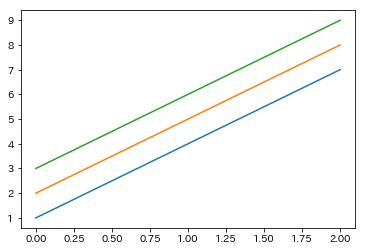

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df)

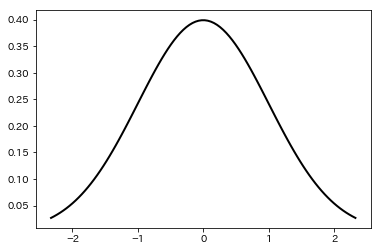

In [28]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [29]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target
# ラベルの0と1を反転

X = X[:, :10]
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

/Users/terapyon/dev/ipython/scipy-japan/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[341  16]
 [ 36 176]]


In [31]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

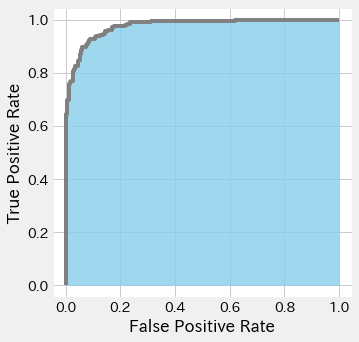

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()